In [101]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 




In [102]:
data = pd.read_csv("Diabetes.csv")
#read in the data using pandas


In [103]:
data.head()
#check data has been read in properly

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [104]:
print(len(data))
#length of dataset line

2000


In [105]:
data.dtypes


Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [106]:
pd.isnull(data).sum()
#We do not have any null values in our dataset. It will ease the preprocessing step.

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [107]:
data.describe()
#8 rows × 21 columns

#As mentioned above, our data have labels and we will apply supervised learning algorithms.


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [108]:
zero_not_accepted = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

#values of columns like 'Glucose, BloodPressure' can not be accepted as zeroes because it will affect the outcome
#we could replaced such values with the mean of the respective column

In [109]:
for column in zero_not_accepted:
    data[column] = data[column].replace(0, np.NaN)
    mean = int(data[column].mean(skipna=True))
    data[column] = data[column].replace(np.NaN, mean)
#we didn't want zero because it disrupts the cleanliness of data.
#mean is the average which is integer from the dataset. 
# we replaced zero with the average what is the most common data 

Text(0, 0.5, 'DiabetesPedigreeFunction')

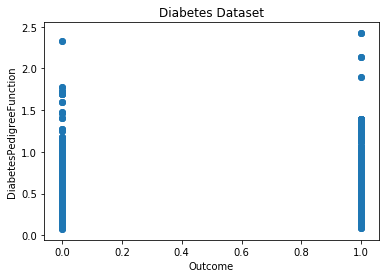

In [110]:
# create a figure and axis
fig, ax = plt.subplots()

# scatter the Outcome against the DiabetesPedigreeFunction
ax.scatter(data['Outcome'], data['DiabetesPedigreeFunction'])
# set a title and labels
ax.set_title('Diabetes Dataset')
ax.set_xlabel('Outcome')
ax.set_ylabel('DiabetesPedigreeFunction')
#Diabetes Pedigree Function between 1.3 and 2.3 are negative.


Text(0, 0.5, 'BloodPressure')

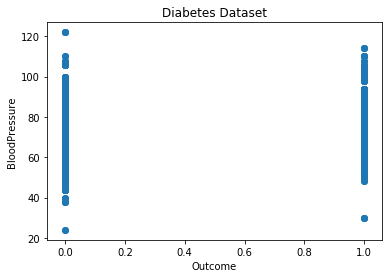

In [111]:
# create a figure and axis
fig, ax = plt.subplots()

# scatter the Outcome against the BloodPressure
ax.scatter(data['Outcome'], data['BloodPressure'])
# set a title and labels
ax.set_title('Diabetes Dataset')
ax.set_xlabel('Outcome')
ax.set_ylabel('BloodPressure')
#BloodPressure Function between 40 and 50 are negative.


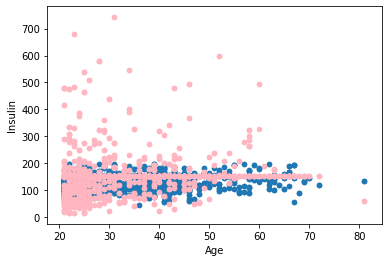

In [112]:
import matplotlib.pyplot as plt


# gca stands for 'get current axis'
ax = plt.gca()

data.plot(kind='scatter',x='Age',y='Glucose',ax=ax)
data.plot(kind='scatter',x='Age',y='Insulin', color='lightpink', ax=ax)

plt.show()
#we wanted to see the statistics of glucose and insulin values by age. 
#We found that the insulin and glucose levels are high or low, not related to age.


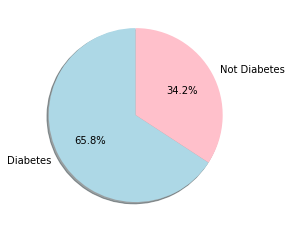

In [113]:
labels = ["Diabetes", "Not Diabetes"]
values = data['Outcome'].value_counts().values
colors = ['lightblue', 'pink']
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.set_title('')
plt.show()


In [114]:
print(data['Glucose'])

0       138.0
1        84.0
2       145.0
3       135.0
4       139.0
        ...  
1995     75.0
1996    179.0
1997     85.0
1998    129.0
1999     81.0
Name: Glucose, Length: 2000, dtype: float64


In [115]:
#Before proceeing further,let's split the dataset into train and test
#split dataset
X = data.iloc[:, 0:8] # we have taken from 0 to 8 indexed column
y = data.iloc[:, 8]# we have take just 8 indexed column
#the other way
#X = data.drop(columns=[‘Outcome’])
#y = data[‘Outcome’].values
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0, test_size=0.2)
#We split our dataset 80% train 20% test


In [116]:
y.unique()
# We have two ranges as target values 

array([1, 0])

In [117]:
#Feature Scaling, standard scaler does keeps it standardized and we wanted to fit the scaler with the training set 
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

#we have trained and transformed the X_train 
#and then the X_test wasn't part of that training it wasn't part of that of training the transformer, 
#it just gets transformed 

In [118]:
#KNN
##N_neighbors here is "K" p is the power parameter to define the metric used, which is "Euclidean" in our case
#Define the model: Init K_NN
classifier = KNeighborsClassifier(n_neighbors=11, p=2, metric="euclidean")
#Fit model
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

In [119]:
#given the test and predicted the outcomes  
result = classifier.predict(X_test)
classifier.predict(X_test)[0:10]


array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0])

In [120]:
#Evaluated Model, it's important to evaluate the model, used confusion matrix to do that
cm = confusion_matrix(y_test, result)
print(cm)


[[239  33]
 [ 49  79]]


In [121]:
print(accuracy_score(y_test,result))

0.795


In [122]:
#Accuracy of 79% tells us that it is a pretty fair fit in the model


In [123]:
#In the first try, we did not know the optimum 'k'.
#Let's find the optimum 'k' value Grid Search method and run knn model with this 'k'.
from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors':np.arange(1,30)}
knn = KNeighborsClassifier()

model = GridSearchCV(knn, parameters, cv=5)
model.fit(X_train, y_train)
model.best_params_

{'n_neighbors': 1}

In [124]:
#After finding optimum k number, we run our model again with k=1.

In [125]:

model_knn = KNeighborsClassifier(n_neighbors=1)  
model_knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [126]:

best_result = model_knn.predict(X_test)

In [127]:
print(metrics.confusion_matrix(y_test, best_result))

[[268   4]
 [  3 125]]


In [128]:
acc_knn = accuracy_score(y_test, best_result)
acc_knn


0.9825

In [129]:
#finded optimum k then could found The best accuracy score which is 0.9825

In [130]:
#Logistic Regression
#It is used for classification of categorical or numerical data. 
#It works only if the dependent variable, that is, the result can only take 2 different values. patient / not patient

In [131]:
lr = LogisticRegression(multi_class = 'multinomial', solver = 'sag',  max_iter = 10000)
lr.fit(X_train, y_train)
#we fit the model to the training set.

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [132]:
result = lr.predict(X_test)

In [133]:
confusion_matrix = metrics.confusion_matrix(y_test, result)
confusion_matrix

array([[243,  29],
       [ 55,  73]])

In [134]:
acc_lr = metrics.accuracy_score(y_test, result)
acc_lr

0.79

In [135]:
#our accuracy score is 0.79. Accuracy of 79% tells us that it is a pretty fair fit in the model

In [136]:
#Decision Tree
#Decision tree is one of the most popular supervised learning algorithm that is mostly used in classification problems.
#Each internal node of the tree corresponds to an attribute, and each leaf node corresponds to a class label.

In [137]:
dt = DecisionTreeClassifier(random_state=101)
dt_model = dt.fit(X_train, y_train)
#we fit the model to the training set.

In [138]:
result = dt.predict(X_test)

In [139]:
result

array([0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [140]:
#After building a decision tree model, now, we are going to measure the performance of the model by means of confusion matrix:
print(metrics.confusion_matrix(y_test, result))

[[270   2]
 [  2 126]]


In [141]:
#Even though precision and recall are good measures for imbalanced data, we can see on these concepts here
print(metrics.classification_report(y_test, result))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       272
           1       0.98      0.98      0.98       128

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400



In [142]:
acc_dt = metrics.accuracy_score(y_test, result)
acc_dt
#a pretty satisfying accuracy score.
#We see that accuracy score in random decision tree is higher than knn accuracy score.

0.99

In [143]:
#Random Forest
#Random forest is a type of ensemble method of machine learning. 
#Random Forest made out of decision trees
#It deals with overfitting problem and increase accuracy compared to a simple decision tree model.

In [144]:
rf = RandomForestClassifier(n_estimators = 100, random_state=101, criterion = 'entropy', oob_score = True) 
model_rf = rf.fit(X_train, y_train)
#we fit the model to the training set.

In [145]:
result = rf.predict(X_test)

In [146]:
#Created confusion matrix
print(metrics.confusion_matrix(y_test, result))

[[272   0]
 [  2 126]]


In [147]:
pd.crosstab(y_test, result, rownames=['Actual Class'], colnames=['Predicted Class'])

Predicted Class,0,1
Actual Class,,
0,272,0
1,2,126


In [148]:
acc_rf = metrics.accuracy_score(y_test, result)
acc_rf

0.995

In [149]:
#We see that accuracy score in random forest model is higher than other algorithm.

In [150]:
#Conclusion

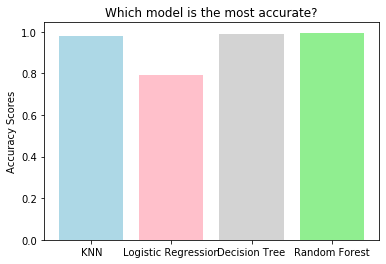

In [151]:
models = ['KNN', 'Logistic Regression', 'Decision Tree', 'Random Forest']
acc_scores = [0.98, 0.79, 0.99, 0.995]

plt.bar(models, acc_scores, color=['lightblue', 'pink', 'lightgrey', 'lightgreen'])
plt.ylabel("Accuracy Scores")
plt.title("Which model is the most accurate?")
plt.show()

In [152]:
#After training our dataset with four different model, we conclude that Random Forest is best model for our dataset. 
#Highest accuracy score = 0.995